# Check lognormal sampling as a function of uncertainty magnitude

In [1]:
import sandy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

In [4]:
nsmp = 1e5

Two parameters, the first with an uncertainty larger than the second.

We parametrically change the uncertainty:
- up to 200% for the first term
- the second term follow the first in relative terms

In [5]:
nrm_m = {}
nrm_c = {}
ss0 = {}
ss1 = {}
for j in np.arange(1, 21) / 10:
    c = np.array([[1, 0],[0, 0.1]]) * j
    s = sandy.CategoryCov(c).sampling(nsmp, pdf="lognormal")
    ss0[j] = s.data.iloc[0].values
    ss1[j] = s.data.iloc[1].values
    nrm_m[j] = np.linalg.norm(s.get_mean().values - np.array([1, 1])) / np.linalg.norm(np.array([1, 1])) * 100
    nrm_c[j] = np.linalg.norm(s.get_cov().values - c) / np.linalg.norm(c) * 100

Plotting the lognormally-distributed samples as a function of the uncertainty scale.

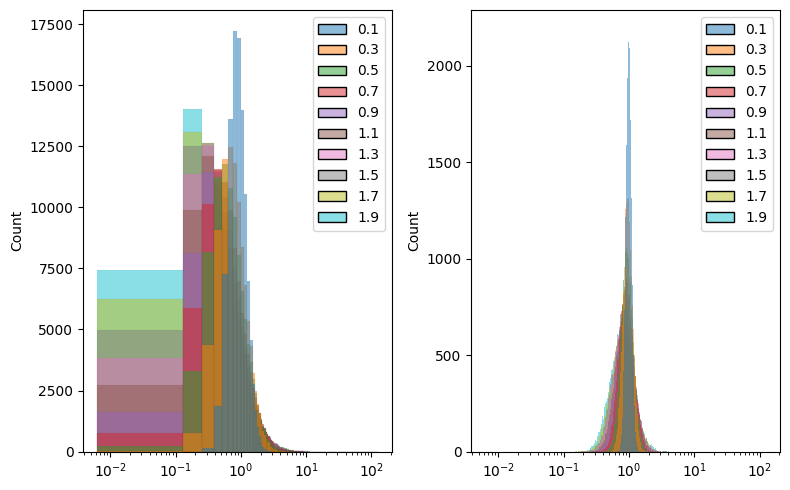

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), dpi=100, sharex=True)

ax = axs[0]
sns.histplot(pd.DataFrame(ss0).iloc[:, ::2], ax=ax, bins=1000)

ax = axs[1]
sns.histplot(pd.DataFrame(ss1).iloc[:, ::2], ax=ax, bins=1000)
ax.set(xscale="log")

fig.tight_layout()

Plotting the 2-norm of th e sample mean and covariance matrix with respect to the original data, as a function of the uncertainty scale.

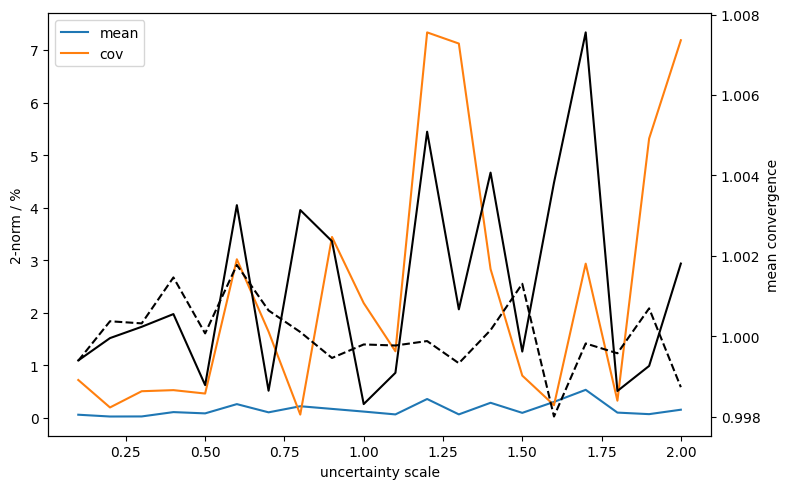

In [7]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
pd.DataFrame({"mean": nrm_m, "cov": nrm_c}).plot(ax=ax)
ax2 = ax.twinx()
pd.Series(pd.DataFrame(ss0).mean()).plot(ax=ax2, color="k")
pd.Series(pd.DataFrame(ss1).mean()).plot(ax=ax2, color="k", ls="--")
ax.set(ylabel="2-norm / %", xlabel="uncertainty scale")
ax2.set(ylabel="mean convergence")
fig.tight_layout()